Variables $\{x_1,x_2,\ldots,x_n\}$ are i.i.d. generated from $p(X_i=x)$, $i=1,\ldots,n$

Variables $c_i = x_i + x_{i+1}$, $i=1,\ldots,n-1$, are obtained by summing consequtive $x_i$ and $x_{i+1}$. 


Task 1 (Convolution): Given $P(X_i=x)$, $i=1,\ldots,n$, compute $P(C_i=c)$, $i=1,\ldots,n-1$. 

Task 2 (Deconvolution): Given $p(C_i=c)$, $i=1,\ldots,n-1$, find $p(X_i=x)$, $i=1,\ldots,n$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from seqevents import Events

MAE(Px,ext_Px)=0.0077932183951536045
MAE(Pc,ext_Pc)=0.02749265118441857


Text(0.5, 1.0, 'estiamted Pc')

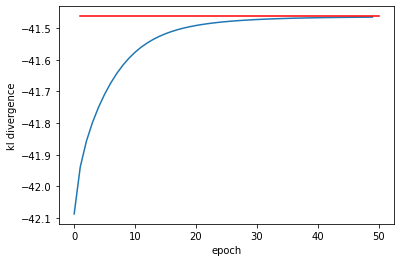

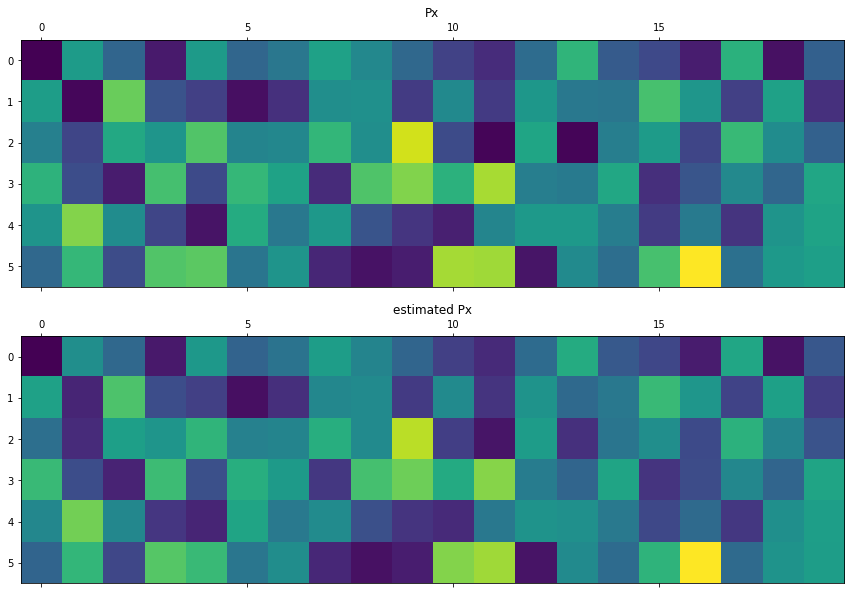

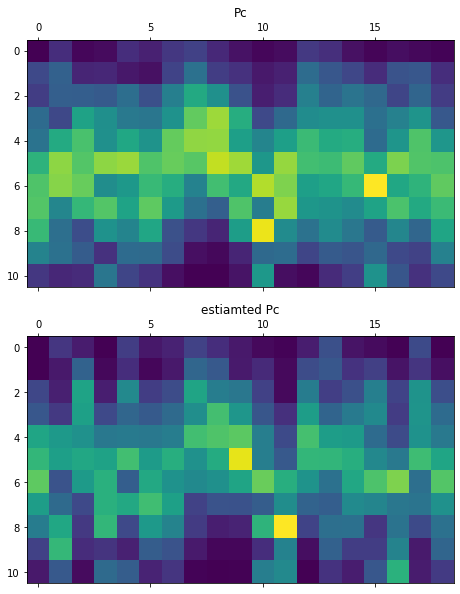

In [8]:
# generate P(X_i=x), i=1,...,n
n_events = 5
seq_len = 20

Px = np.random.rand(n_events+1, seq_len)
Px = Px / np.sum( Px, axis=0)

# compute P(C_i=c) from P(X_i=x)
A = Events( n_events, seq_len)

Pc = A.conv( Px )

# estimatecompute P(X_i) from P(C_i)
est_Px, est_Pc, kl_hist = A.deconv( Pc )

plt.figure()
plt.plot( kl_hist)
plt.plot( [1, len(kl_hist)], A.get_kl(Pc,Px)*np.array([1,1]), color='r' )
plt.xlabel('epoch')
plt.ylabel('kl divergence')

print(f"MAE(Px,ext_Px)={np.mean( np.abs( Px-est_Px))}")
print(f"MAE(Pc,ext_Pc)={np.mean( np.abs( Pc-est_Pc))}")

_, (ax1,ax2) = plt.subplots(2,1,figsize=(80,10))
ax1.matshow(Px)
ax1.set_title('Px')
ax2.matshow(est_Px)
ax2.set_title('estimated Px')

_, (ax1,ax2) = plt.subplots(2,1,figsize=(80,10))
ax1.matshow(Pc)
ax1.set_title('Pc')
ax2.matshow(est_Pc)
ax2.set_title('estiamted Pc')

       
    


MAE(Px,ext_Px)=0.012112191414886524
MAE(Pc,ext_Pc)=0.02588581625284076


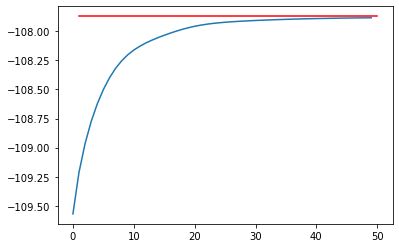

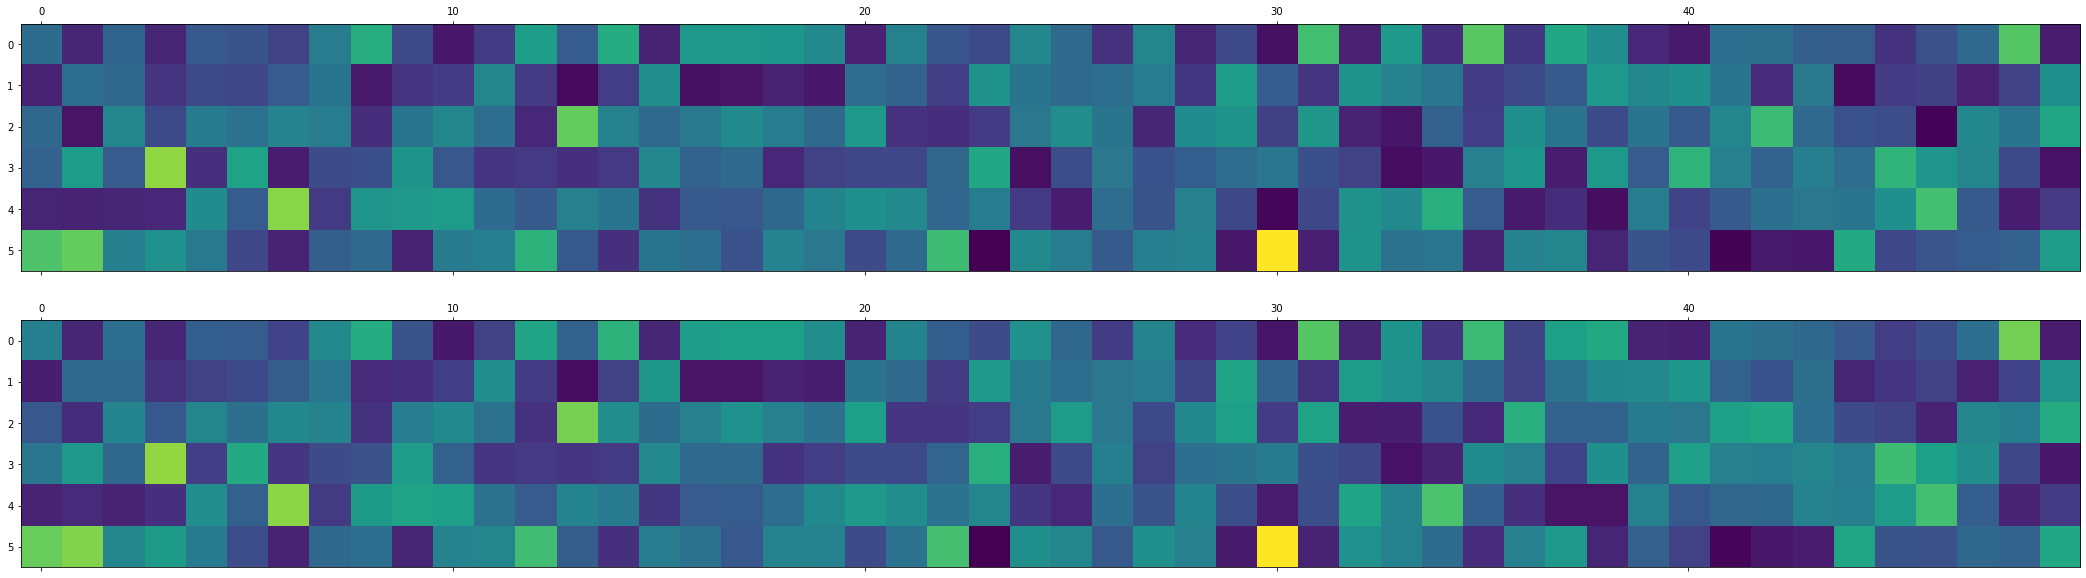

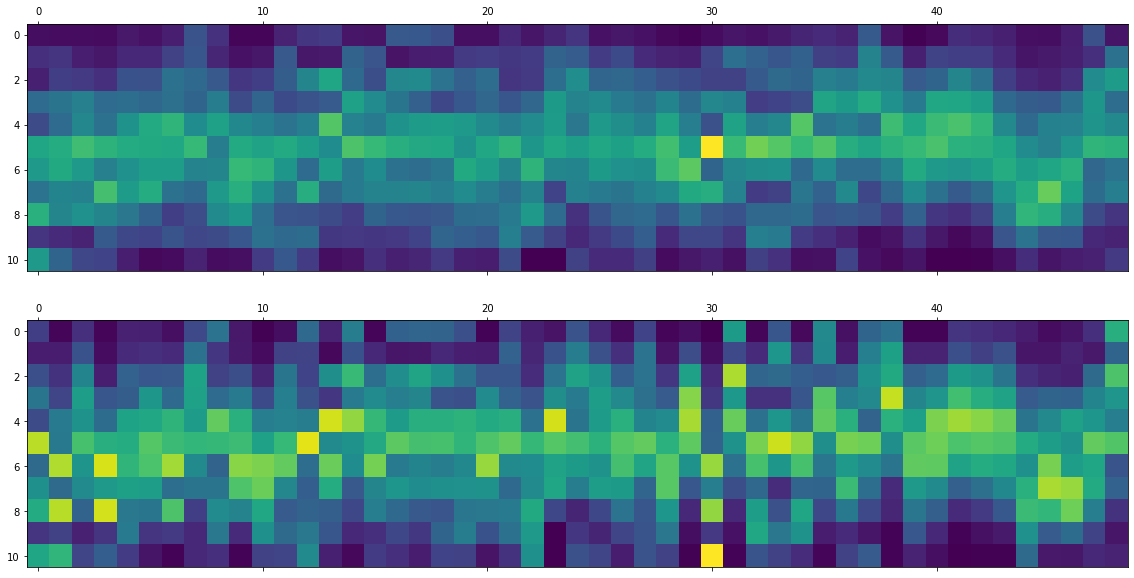

In [7]:

est_Px, est_Pc, kl_hist = A.deconv( Pc )
plt.figure()
plt.plot( kl_hist)
plt.plot( [1, len(kl_hist)], A.get_kl(Pc,Px)*np.array([1,1]), color='r' )


print(f"MAE(Px,ext_Px)={np.mean( np.abs( Px-est_Px))}")
print(f"MAE(Pc,ext_Pc)={np.mean( np.abs( Pc-est_Pc))}")

_, (ax1,ax2) = plt.subplots(2,1,figsize=(80,10))
ax1.matshow(Px)
ax2.matshow(est_Px)

_, (ax1,ax2) = plt.subplots(2,1,figsize=(80,10))
ax1.matshow(Pc)
ax2.matshow(est_Pc)
